We have the data, the first we have to do is organize in runs:

1. Organize runs
2. Add anotations individually (maybe this step will go when data is saved, need decodeState()
3. Create runs as packets per sessions
4. Continue with normla tutorial

# 1. Organize runs

In [ ]:
from os import getcwd, listdir
from os.path import isfile, join

data_path = join(getcwd(), "..\\cortex\\data")

files = [f for f in listdir(data_path) if isfile(join(data_path, f))]
trials_files = [f for f in files if ".fif" in f]

def printA(l):
    print("[")
    for i in l:
        print(f"\t{i}")
    print("]")

def join_trial(trial):
    trial[1] = str(trial[1])
    trial = "_".join(trial)
    return trial

def split_trial(trial):
    trial = trial.split("_")
    trial[1] = int(trial[1])
    return trial

def sort_trials(trials):
    split_trials = [split_trial(t) for t in trials]    
    split_trials = sorted(split_trials, key=lambda x: x[1])
    trials = [join_trial(t) for t in split_trials]
    return trials

def decode_trial(trial, protocol="graz"):
    # 6 session, # 4 runs, # 20 trials
    raw_state = trial.split("_")
    raw_state = int(raw_state[1]) - 1
    
    mov = 2
    tri = 10
    run = 4
    ses = 6
    
    state = {
        "session": (int(raw_state / int(tri * mov * run)) % ses) + 1,
        "run": (int(raw_state / int(tri * mov)) % run) + 1,
        "movement": (int(raw_state / tri) % mov) + 1,
        "trial": (raw_state % tri) + 1
    }
    
    return state 
    
trials_files = sort_trials(trials_files)
printA(trials_files)
printA([decode_trial(s) for s in trials_files])

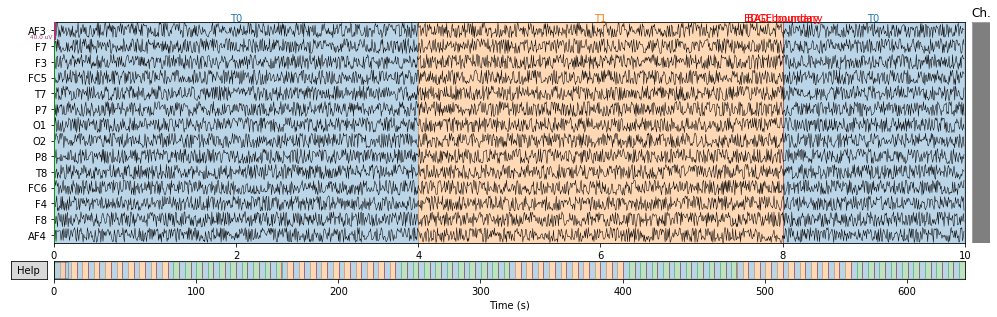

In [79]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import logging

mnelogger = logging.getLogger('mne')
mnelogger.setLevel(logging.WARNING)

data_path = join(getcwd(), "..\\cortex\\data")
# trials_files = [join(data_path, f) for f in trials_files]

def normalize_data(channel):
    channel = (channel - 4200) / 10 ** 6
    return channel

# primero la separamos por sesiones
# pero como solo tenemos una sesion, la separamos por serie
# esta linea puede evitarse si es que tenemos la serie como valor global
runs = np.array([decode_trial(s)['run'] for s in trials_files])
runs = np.unique(runs)
# print(runs)

runs_files = []

for i in range(0, len(runs)):
    run = [t for t in trials_files if decode_trial(t)['run'] is i + 1]
    # instead of 20 should be movement * trial
    if len(run) is 20:
        runs_files.append(run)
    
# printA(runs_files)

#from mne.io import concatenate_raws

def concatenate_trials(run):
    trials = []
    for t in run:
        t = join(data_path, t)   
        raw = mne.io.read_raw_fif(t)
        raw.load_data()
        raw.apply_function(normalize_data)
        trials.append(raw)
        
    raw_run = mne.io.concatenate_raws(trials)
    return raw_run

raw = mne.io.concatenate_raws([concatenate_trials(r) for r in runs_files])
raw.plot()
plt.show()

# plotear para ver si la data se ha guardado bien
#for t in trials_files[:3]:
#    t = join(data_path, t)
#    raw = mne.io.read_raw_fif(t)
#    raw.load_data()
#    raw.apply_function(normalize_data)
#    raw.filter(7., 30., fir_design='firwin', skip_by_annotation='edge')
#    raw.plot()

In [117]:
epochs.info
print(len(epochs))
for e in epochs:
    print("one epoch")
    print(e.shape)
    print(e)


80
one epoch
(14, 577)
[[2.08798828e-05 1.13598633e-05 2.60000000e-05 ... 3.10800781e-05
  4.72021484e-06 2.57998047e-05]
 [2.11201172e-05 2.44799805e-05 1.94399414e-05 ... 1.42797852e-05
  1.46401367e-05 2.40800781e-05]
 [4.47998047e-06 1.95600586e-05 3.49199219e-05 ... 3.32001953e-05
  3.08798828e-05 3.95996094e-06]
 ...
 [3.32797852e-05 3.62402344e-05 3.99599609e-05 ... 1.11201172e-05
  1.60000000e-05 2.77998047e-05]
 [2.90800781e-05 1.27202148e-05 2.27202148e-05 ... 2.17998047e-05
  2.00195312e-07 9.31982422e-06]
 [8.68017578e-06 2.63999023e-05 1.75200195e-05 ... 3.46401367e-05
  7.35986328e-06 1.03598633e-05]]
one epoch
(14, 577)
[[1.02001953e-05 2.29599609e-05 6.68017578e-06 ... 7.43994141e-06
  2.87998047e-05 2.72797852e-05]
 [8.68017578e-06 2.33598633e-05 2.31601563e-05 ... 3.49199219e-05
  3.30400391e-05 2.96000977e-05]
 [2.78798828e-05 2.72402344e-05 2.93198242e-05 ... 3.19199219e-05
  3.91201172e-05 5.35986328e-06]
 ...
 [3.35200195e-05 2.16000977e-05 1.08398438e-05 ... 3.12

In [115]:
epochs.events

array([[  512,     0,     2],
       [ 1537,     0,     2],
       [ 2562,     0,     2],
       [ 3587,     0,     2],
       [ 4612,     0,     2],
       [ 5637,     0,     2],
       [ 6662,     0,     2],
       [ 7687,     0,     2],
       [ 8712,     0,     2],
       [ 9737,     0,     2],
       [10762,     0,     3],
       [11787,     0,     3],
       [12812,     0,     3],
       [13837,     0,     3],
       [14862,     0,     3],
       [15887,     0,     3],
       [16912,     0,     3],
       [17937,     0,     3],
       [18962,     0,     3],
       [19987,     0,     3],
       [21012,     0,     2],
       [22037,     0,     2],
       [23062,     0,     2],
       [24087,     0,     2],
       [25112,     0,     2],
       [26137,     0,     2],
       [27162,     0,     2],
       [28187,     0,     2],
       [29212,     0,     2],
       [30237,     0,     2],
       [31262,     0,     3],
       [32287,     0,     3],
       [33312,     0,     3],
       [34

In [118]:
epochs_train.info
print(len(epochs_train))
for e in epochs_train:
    print("one epoch")
    print(e.shape)
    print(e)

80
one epoch
(14, 129)
[[7.20214844e-07 2.87998047e-05 3.04799805e-05 ... 1.89599609e-05
  2.31601563e-05 7.99804687e-07]
 [5.79980469e-06 2.12797852e-05 1.37998047e-05 ... 1.97998047e-05
  3.35200195e-05 5.00000000e-06]
 [2.94399414e-05 1.94399414e-05 3.32402344e-05 ... 1.11201172e-05
  9.35986328e-06 3.65600586e-05]
 ...
 [1.91992187e-06 1.20117188e-07 1.95996094e-06 ... 3.16401367e-05
  6.72021484e-06 1.67202148e-05]
 [3.90400391e-05 3.67597656e-05 2.68398438e-05 ... 3.81601562e-05
  1.83198242e-05 3.22402344e-05]
 [9.91992188e-06 3.07202148e-05 2.59199219e-05 ... 1.48798828e-05
  3.58798828e-05 2.60400391e-05]]
one epoch
(14, 129)
[[1.19599609e-05 2.02001953e-05 2.91201172e-05 ... 3.89599609e-05
  1.42001953e-05 2.69199219e-05]
 [3.31982422e-06 1.27998047e-05 1.34399414e-05 ... 5.75976562e-06
  8.72021484e-06 2.60800781e-05]
 [3.48798828e-05 3.22797852e-05 1.00000000e-05 ... 2.92797852e-05
  1.64399414e-05 2.39599609e-05]
 ...
 [1.19199219e-05 3.36000977e-05 6.08007812e-06 ... 1.36

In [119]:
epochs.get_data()

array([[[2.08798828e-05, 1.13598633e-05, 2.60000000e-05, ...,
         3.10800781e-05, 4.72021484e-06, 2.57998047e-05],
        [2.11201172e-05, 2.44799805e-05, 1.94399414e-05, ...,
         1.42797852e-05, 1.46401367e-05, 2.40800781e-05],
        [4.47998047e-06, 1.95600586e-05, 3.49199219e-05, ...,
         3.32001953e-05, 3.08798828e-05, 3.95996094e-06],
        ...,
        [3.32797852e-05, 3.62402344e-05, 3.99599609e-05, ...,
         1.11201172e-05, 1.60000000e-05, 2.77998047e-05],
        [2.90800781e-05, 1.27202148e-05, 2.27202148e-05, ...,
         2.17998047e-05, 2.00195312e-07, 9.31982422e-06],
        [8.68017578e-06, 2.63999023e-05, 1.75200195e-05, ...,
         3.46401367e-05, 7.35986328e-06, 1.03598633e-05]],

       [[1.02001953e-05, 2.29599609e-05, 6.68017578e-06, ...,
         7.43994141e-06, 2.87998047e-05, 2.72797852e-05],
        [8.68017578e-06, 2.33598633e-05, 2.31601563e-05, ...,
         3.49199219e-05, 3.30400391e-05, 2.96000977e-05],
        [2.78798828e-05, 

#  without breaks

Number of events: 80
Unique event codes: [2 3]
80
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1]
Classification accuracy: 0.606250 / Chance level: 0.500000
(80, 14, 577)
64
[  0  12  24  36  48  60  72  84  96 108 120 132 144 156 168 180 192 204
 216 228 240 252 264 276 288 300 312 324 336 348 360 372 384 396 408 420
 432 444 456 468 480 492 504]
<generator object BaseShuffleSplit.split at 0x000002101236A948>
shapes
(64, 4)
(16, 4)
predict for this windows
n:  0 64
(16, 14, 64)
(16, 4)
[[-0.96669782 -0.51169472 -0.63966049 -0.77727636]
 [-0.47398868 -0.68106986 -0.70282442 -0.86931267]
 [-0.80004681 -0.32112265 -0.81125593 -0.53928807]
 [-1.25308381 -0.66702288 -0.72579023 -0.78515066]
 [-0.80502318 -0.75333739 -0.65214318 -0.71655066]
 [-0.38629845 -0.40668514 -0.63021888 -0.82810771]
 [-0.83779561 -0.52844862 -0.66532979 -0.36975552]
 [-0.90407803 -0.78127829 -0.690559

n:  336 400
(16, 14, 64)
(16, 4)
[0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0]
(16,)
0.3125
predict for this windows
n:  348 412
(16, 14, 64)
(16, 4)
[0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0]
(16,)
0.25
predict for this windows
n:  360 424
(16, 14, 64)
(16, 4)
[0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0]
(16,)
0.25
predict for this windows
n:  372 436
(16, 14, 64)
(16, 4)
[0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0]
(16,)
0.375
predict for this windows
n:  384 448
(16, 14, 64)
(16, 4)
[0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0]
(16,)
0.4375
predict for this windows
n:  396 460
(16, 14, 64)
(16, 4)
[0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0]
(16,)
0.625
predict for this windows
n:  408 472
(16, 14, 64)
(16, 4)
[0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0]
(16,)
0.5625
predict for this windows
n:  420 484
(16, 14, 64)
(16, 4)
[0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0]
(16,)
0.625
predict for this windows
n:  432 496
(16, 14, 64)
(16, 4)
[1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0]
(16,)
0.625
predict for this windows
n:  444 508
(16, 14, 64)
(16, 4)
[0 0 0 0 1 1 0 1 1 1 0 1 0 0 0

(16, 14, 64)
(16, 4)
[0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1]
(16,)
0.625
predict for this windows
n:  156 220
(16, 14, 64)
(16, 4)
[0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1]
(16,)
0.5
predict for this windows
n:  168 232
(16, 14, 64)
(16, 4)
[0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1]
(16,)
0.5
predict for this windows
n:  180 244
(16, 14, 64)
(16, 4)
[0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1]
(16,)
0.3125
predict for this windows
n:  192 256
(16, 14, 64)
(16, 4)
[1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0]
(16,)
0.4375
predict for this windows
n:  204 268
(16, 14, 64)
(16, 4)
[1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0]
(16,)
0.4375
predict for this windows
n:  216 280
(16, 14, 64)
(16, 4)
[1 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1]
(16,)
0.3125
predict for this windows
n:  228 292
(16, 14, 64)
(16, 4)
[1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0]
(16,)
0.375
predict for this windows
n:  240 304
(16, 14, 64)
(16, 4)
[1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0]
(16,)
0.5625
predict for this windows
n:  252 316
(16, 14, 64)
(16, 4)
[0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1]
(16,)
0.

predict for this windows
n:  0 64
(16, 14, 64)
(16, 4)
[[-1.11979418 -0.52132653 -0.7995496  -0.74466261]
 [-1.0908223  -0.4386817  -0.59780456 -0.38154774]
 [-0.60891638 -0.32682231 -0.64066708 -0.59523495]
 [-0.87369786 -0.61031421 -0.73354808 -0.68025464]
 [-0.44471573 -0.90838411 -0.24303136 -0.7129956 ]
 [-0.60999023 -0.76919937 -0.98255308 -0.90886553]
 [-0.72603042 -0.39966631 -0.97343326 -0.54111198]
 [-0.82643586 -0.78418258 -0.7573843  -0.83377228]
 [-0.72914061 -0.77983821 -0.68297035 -0.69856219]
 [-0.90314105 -0.66561848 -0.67371601 -0.51254382]
 [-0.43059637 -1.07451993 -0.70158105 -0.60945716]
 [-0.68033491 -0.4913344  -0.53568044 -0.62680729]
 [-0.89386004 -0.70600771 -0.6683306  -0.82011775]
 [-0.43923657 -0.54901526 -0.83095744 -0.64844723]
 [-0.64336457 -0.73272864 -0.81025345 -0.73036779]
 [-0.5492069  -0.74474688 -0.54105003 -0.72309113]]
[1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0]
[1 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0]
(16,)
0.75
predict for this windows
n:  12 76
(16, 14, 64)
(

(16, 14, 64)
(16, 4)
[0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1]
(16,)
0.5
predict for this windows
n:  288 352
(16, 14, 64)
(16, 4)
[0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1]
(16,)
0.5625
predict for this windows
n:  300 364
(16, 14, 64)
(16, 4)
[0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1]
(16,)
0.5
predict for this windows
n:  312 376
(16, 14, 64)
(16, 4)
[0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1]
(16,)
0.625
predict for this windows
n:  324 388
(16, 14, 64)
(16, 4)
[0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1]
(16,)
0.625
predict for this windows
n:  336 400
(16, 14, 64)
(16, 4)
[0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0]
(16,)
0.375
predict for this windows
n:  348 412
(16, 14, 64)
(16, 4)
[0 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0]
(16,)
0.4375
predict for this windows
n:  360 424
(16, 14, 64)
(16, 4)
[0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0]
(16,)
0.5
predict for this windows
n:  372 436
(16, 14, 64)
(16, 4)
[0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0]
(16,)
0.5
predict for this windows
n:  384 448
(16, 14, 64)
(16, 4)
[1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0]
(16,)
0.5
predi

[1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0]
(16,)
0.375
predict for this windows
n:  72 136
(16, 14, 64)
(16, 4)
[0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1]
(16,)
0.3125
predict for this windows
n:  84 148
(16, 14, 64)
(16, 4)
[0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
(16,)
0.4375
predict for this windows
n:  96 160
(16, 14, 64)
(16, 4)
[0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1]
(16,)
0.3125
predict for this windows
n:  108 172
(16, 14, 64)
(16, 4)
[0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1]
(16,)
0.5
predict for this windows
n:  120 184
(16, 14, 64)
(16, 4)
[0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1]
(16,)
0.3125
predict for this windows
n:  132 196
(16, 14, 64)
(16, 4)
[0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1]
(16,)
0.5
predict for this windows
n:  144 208
(16, 14, 64)
(16, 4)
[0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1]
(16,)
0.5
predict for this windows
n:  156 220
(16, 14, 64)
(16, 4)
[1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1]
(16,)
0.4375
predict for this windows
n:  168 232
(16, 14, 64)
(16, 4)
[1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1]
(16,)
0.5625
predict for this wind

predict for this windows
n:  408 472
(16, 14, 64)
(16, 4)
[0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1]
(16,)
0.6875
predict for this windows
n:  420 484
(16, 14, 64)
(16, 4)
[0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1]
(16,)
0.5
predict for this windows
n:  432 496
(16, 14, 64)
(16, 4)
[0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0]
(16,)
0.5625
predict for this windows
n:  444 508
(16, 14, 64)
(16, 4)
[0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0]
(16,)
0.5
predict for this windows
n:  456 520
(16, 14, 64)
(16, 4)
[0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0]
(16,)
0.4375
predict for this windows
n:  468 532
(16, 14, 64)
(16, 4)
[0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 0]
(16,)
0.4375
predict for this windows
n:  480 544
(16, 14, 64)
(16, 4)
[0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1]
(16,)
0.5625
predict for this windows
n:  492 556
(16, 14, 64)
(16, 4)
[0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0]
(16,)
0.4375
predict for this windows
n:  504 568
(16, 14, 64)
(16, 4)
[0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1]
(16,)
0.5


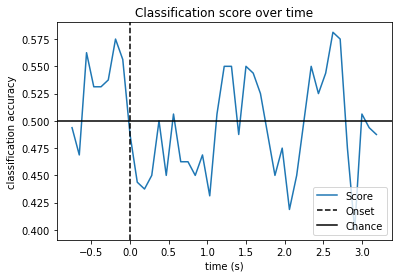

In [143]:
events, _ = mne.events_from_annotations(raw, event_id=dict(T1=2, T2=3))

# Show the number of events (number of rows)
print('Number of events:', len(events))

# Show all unique event codes (3rd column)
print('Unique event codes:', np.unique(events[:, 2]))

# print(events)
# print(type(events))
# mnelogger.setLevel(logging.INFO)
mnelogger.setLevel(logging.WARNING)

# for some reason tmax 4 drop some bad epochs
tmin, tmax = -1., 3.5
event_id = dict(hands=2, feet=3)
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True,
                baseline=None, preload=True)
epochs_train = epochs.copy().crop(tmin=1., tmax=2.)
labels = epochs.events[:, -1] - 2
epochs.events

print(len(labels))
print(labels)
# epochs.plot()
# epochs_train.plot()
plt.show()

from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score

# Define a monte-carlo cross-validation generator (reduce variance):
scores = []
epochs_data = epochs.get_data()
epochs_data_train = epochs_train.get_data()
cv = ShuffleSplit(10, test_size=0.2, random_state=42)
cv_split = cv.split(epochs_data_train)

# Assemble a classifier
lda = LinearDiscriminantAnalysis()
csp = mne.decoding.CSP(n_components=4, reg=None, log=True, norm_trace=False)

# Use scikit-learn Pipeline with cross_val_score function
clf = Pipeline([('CSP', csp), ('LDA', lda)])
scores = cross_val_score(clf, epochs_data_train, labels, cv=cv, n_jobs=1)

# Printing the results
class_balance = np.mean(labels == labels[0])
class_balance = max(class_balance, 1. - class_balance)
print("Classification accuracy: %f / Chance level: %f" % (np.mean(scores),
                                                          class_balance))

# plot CSP patterns estimated on full data for visualization
# csp.fit_transform(epochs_data, labels)

# layout = mne.channels.read_layout('EEG1005')
# csp.plot_patterns(epochs.info, layout=layout, ch_type='eeg',
#                  units='Patterns (AU)', size=1.5)
# plt.show()

sfreq = raw.info['sfreq']
w_length = int(sfreq * 0.5)   # running classifier: window length
w_step = int(sfreq * 0.1)  # running classifier: window step size
print(epochs_data.shape)
print(w_length)
w_start = np.arange(0, epochs_data.shape[2] - w_length, w_step)
print(w_start)
scores_windows = []

print(cv_split)

for train_idx, test_idx in cv_split:
    # print(train_idx, test_idx)
    y_train, y_test = labels[train_idx], labels[test_idx]

    X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
    X_test = csp.transform(epochs_data_train[test_idx])
    print("shapes")
    print(X_train.shape)
    print(X_test.shape)
    
    # fit classifier
    lda.fit(X_train, y_train)

    # running classifier: test classifier on sliding window
    score_this_window = []
    for n in w_start:
        X_test = csp.transform(epochs_data[test_idx][:, :, n:(n + w_length)])
        print("predict for this windows")
        print("n: ", n, n + w_length)
        print(epochs_data[test_idx][:, :, n:(n + w_length)].shape)
        print(X_test.shape)
        if n < 0.1:
            print(X_test)
            print(y_test)
        print(lda.predict(X_test))
        print(lda.predict(X_test).shape)
        print(lda.score(X_test, y_test))
        score_this_window.append(lda.score(X_test, y_test))
        
    scores_windows.append(score_this_window)

# Plot scores over time
w_times = (w_start + w_length / 2.) / sfreq + epochs.tmin

plt.figure()
plt.plot(w_times, np.mean(scores_windows, 0), label='Score')
plt.axvline(0, linestyle='--', color='k', label='Onset')
plt.axhline(0.5, linestyle='-', color='k', label='Chance')
plt.xlabel('time (s)')
plt.ylabel('classification accuracy')
plt.title('Classification score over time')
plt.legend(loc='lower right')
plt.show()

## Events

In [82]:
events, _ = mne.events_from_annotations(raw, event_id=dict(T1=2, T2=3))

# Show the number of events (number of rows)
print('Number of events:', len(events))

# Show all unique event codes (3rd column)
print('Unique event codes:', np.unique(events[:, 2]))

# print(events)
# print(type(events))

Number of events: 80
Unique event codes: [2 3]
[[  512     0     2]
 [ 1537     0     2]
 [ 2562     0     2]
 [ 3587     0     2]
 [ 4612     0     2]
 [ 5637     0     2]
 [ 6662     0     2]
 [ 7687     0     2]
 [ 8712     0     2]
 [ 9737     0     2]
 [10762     0     3]
 [11787     0     3]
 [12812     0     3]
 [13837     0     3]
 [14862     0     3]
 [15887     0     3]
 [16912     0     3]
 [17937     0     3]
 [18962     0     3]
 [19987     0     3]
 [21012     0     2]
 [22037     0     2]
 [23062     0     2]
 [24087     0     2]
 [25112     0     2]
 [26137     0     2]
 [27162     0     2]
 [28187     0     2]
 [29212     0     2]
 [30237     0     2]
 [31262     0     3]
 [32287     0     3]
 [33312     0     3]
 [34337     0     3]
 [35362     0     3]
 [36387     0     3]
 [37412     0     3]
 [38437     0     3]
 [39462     0     3]
 [40487     0     3]
 [41512     0     2]
 [42537     0     2]
 [43562     0     2]
 [44587     0     2]
 [45612     0     2]
 [46637 

In [92]:
mnelogger.setLevel(logging.INFO)

# for some reason tmax 4 drop some bad epochs
tmin, tmax = -1., 3.5
event_id = dict(hands=2, feet=3)
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True,
                baseline=None, preload=True)
epochs_train = epochs.copy().crop(tmin=1., tmax=2.)
labels = epochs.events[:, -1] - 2
epochs.events

80 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 80 events and 577 original time points ...
0 bad epochs dropped


array([[  512,     0,     2],
       [ 1537,     0,     2],
       [ 2562,     0,     2],
       [ 3587,     0,     2],
       [ 4612,     0,     2],
       [ 5637,     0,     2],
       [ 6662,     0,     2],
       [ 7687,     0,     2],
       [ 8712,     0,     2],
       [ 9737,     0,     2],
       [10762,     0,     3],
       [11787,     0,     3],
       [12812,     0,     3],
       [13837,     0,     3],
       [14862,     0,     3],
       [15887,     0,     3],
       [16912,     0,     3],
       [17937,     0,     3],
       [18962,     0,     3],
       [19987,     0,     3],
       [21012,     0,     2],
       [22037,     0,     2],
       [23062,     0,     2],
       [24087,     0,     2],
       [25112,     0,     2],
       [26137,     0,     2],
       [27162,     0,     2],
       [28187,     0,     2],
       [29212,     0,     2],
       [30237,     0,     2],
       [31262,     0,     3],
       [32287,     0,     3],
       [33312,     0,     3],
       [34

80
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1]


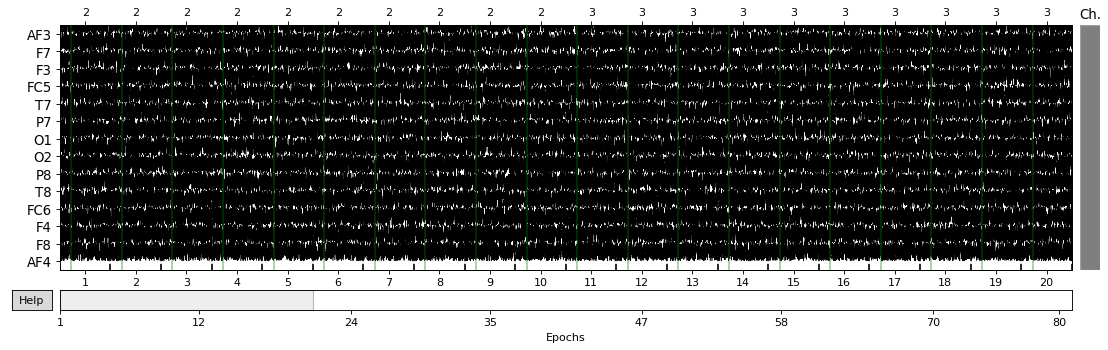

In [95]:
print(len(labels))
print(labels)
epochs.plot()
plt.show()

# Training

Computing data rank from raw with rank=None
    Using tolerance 1.5e-05 (2.2e-16 eps * 14 dim * 4.9e+09  max singular value)
    Estimated rank (mag): 14
    MAG: rank 14 computed from 14 data channels with 0 projectors
Reducing data rank from 14 -> 14
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 1.5e-05 (2.2e-16 eps * 14 dim * 4.9e+09  max singular value)
    Estimated rank (mag): 14
    MAG: rank 14 computed from 14 data channels with 0 projectors
Reducing data rank from 14 -> 14
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 1.5e-05 (2.2e-16 eps * 14 dim * 4.9e+09  max singular value)
    Estimated rank (mag): 14
    MAG: rank 14 computed from 14 data channels with 0 projectors
Reducing data rank from 14 -> 14
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 1.5e-05 (2.2e-16 eps * 14 dim * 4.9e+09  max 

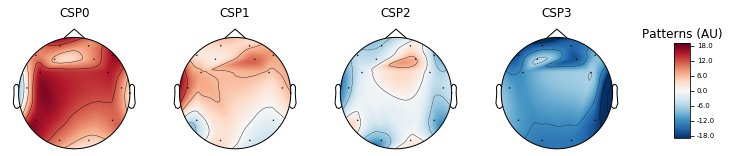

In [100]:
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score

# Define a monte-carlo cross-validation generator (reduce variance):
scores = []
epochs_data = epochs.get_data()
epochs_data_train = epochs_train.get_data()
cv = ShuffleSplit(10, test_size=0.2, random_state=42)
cv_split = cv.split(epochs_data_train)

# Assemble a classifier
lda = LinearDiscriminantAnalysis()
csp = mne.decoding.CSP(n_components=4, reg=None, log=True, norm_trace=False)

# Use scikit-learn Pipeline with cross_val_score function
clf = Pipeline([('CSP', csp), ('LDA', lda)])
scores = cross_val_score(clf, epochs_data_train, labels, cv=cv, n_jobs=1)

# Printing the results
class_balance = np.mean(labels == labels[0])
class_balance = max(class_balance, 1. - class_balance)
print("Classification accuracy: %f / Chance level: %f" % (np.mean(scores),
                                                          class_balance))

# plot CSP patterns estimated on full data for visualization
csp.fit_transform(epochs_data, labels)

layout = mne.channels.read_layout('EEG1005')
csp.plot_patterns(epochs.info, layout=layout, ch_type='eeg',
                  units='Patterns (AU)', size=1.5)
plt.show()

Computing data rank from raw with rank=None
    Using tolerance 1.5e-05 (2.2e-16 eps * 14 dim * 4.9e+09  max singular value)
    Estimated rank (mag): 14
    MAG: rank 14 computed from 14 data channels with 0 projectors
Reducing data rank from 14 -> 14
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 1.5e-05 (2.2e-16 eps * 14 dim * 4.9e+09  max singular value)
    Estimated rank (mag): 14
    MAG: rank 14 computed from 14 data channels with 0 projectors
Reducing data rank from 14 -> 14
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 1.5e-05 (2.2e-16 eps * 14 dim * 4.9e+09  max singular value)
    Estimated rank (mag): 14
    MAG: rank 14 computed from 14 data channels with 0 projectors
Reducing data rank from 14 -> 14
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 1.5e-05 (2.2e-16 eps * 14 dim * 4.9e+09  max 

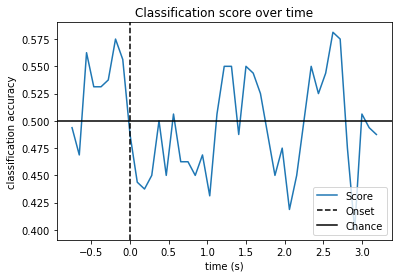

In [101]:
sfreq = raw.info['sfreq']
w_length = int(sfreq * 0.5)   # running classifier: window length
w_step = int(sfreq * 0.1)  # running classifier: window step size
w_start = np.arange(0, epochs_data.shape[2] - w_length, w_step)

scores_windows = []

for train_idx, test_idx in cv_split:
    y_train, y_test = labels[train_idx], labels[test_idx]

    X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
    X_test = csp.transform(epochs_data_train[test_idx])

    # fit classifier
    lda.fit(X_train, y_train)

    # running classifier: test classifier on sliding window
    score_this_window = []
    for n in w_start:
        X_test = csp.transform(epochs_data[test_idx][:, :, n:(n + w_length)])
        score_this_window.append(lda.score(X_test, y_test))
    scores_windows.append(score_this_window)

# Plot scores over time
w_times = (w_start + w_length / 2.) / sfreq + epochs.tmin

plt.figure()
plt.plot(w_times, np.mean(scores_windows, 0), label='Score')
plt.axvline(0, linestyle='--', color='k', label='Onset')
plt.axhline(0.5, linestyle='-', color='k', label='Chance')
plt.xlabel('time (s)')
plt.ylabel('classification accuracy')
plt.title('Classification score over time')
plt.legend(loc='lower right')
plt.show()